In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Logistic Regression

## summary
##### 배경
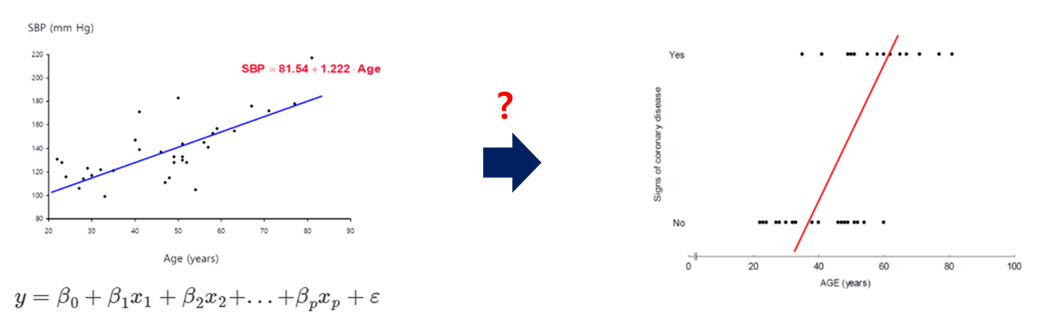

##### 수식
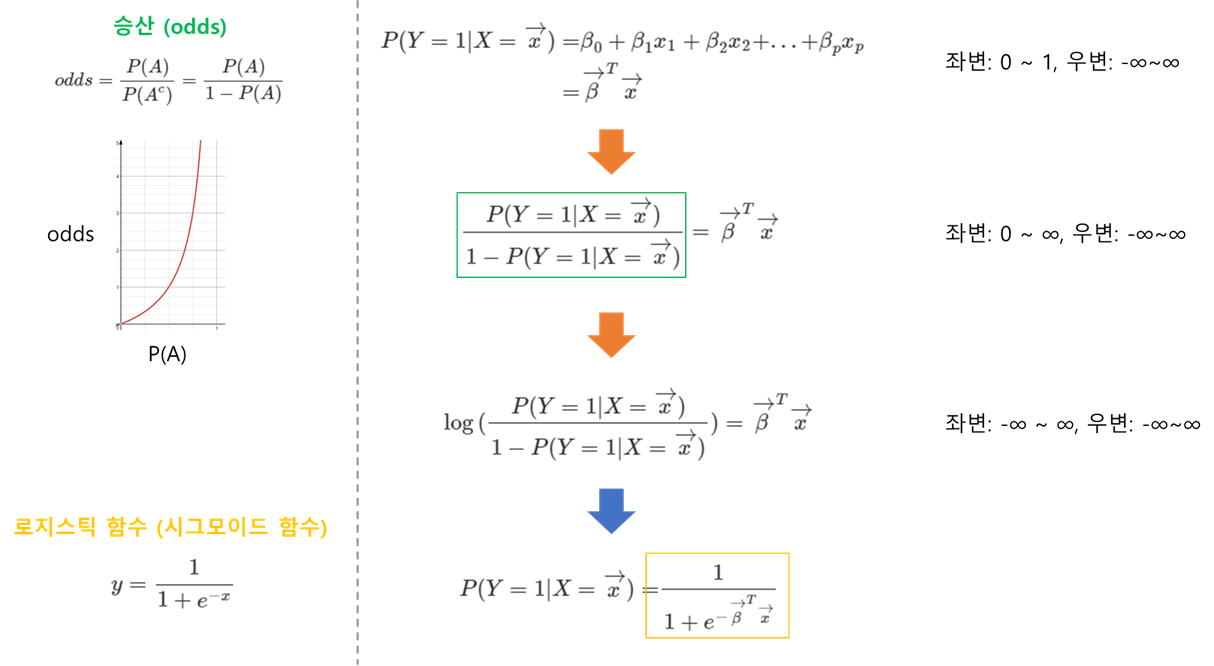

## 실습 data: UniversalBank.csv
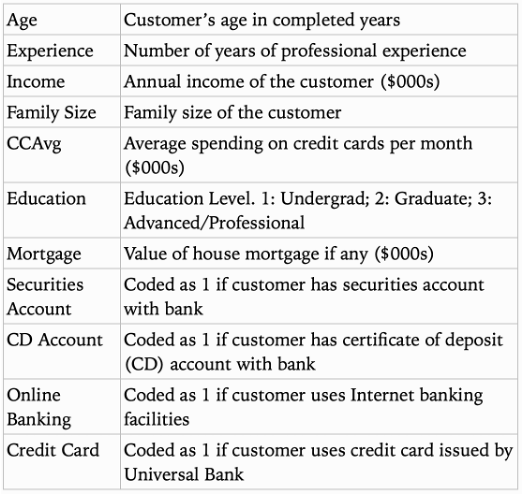

##### UniversalBank.csv 파일을 읽어오시오.

In [2]:
bank_df = pd.read_csv('./data/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### ID, ZIP CODE column들의 경우 사용하지 않을 것임

In [3]:
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df.shape

(5000, 12)

In [5]:
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]
bank_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

##### Education column을 category로 데이터 타입 변경 뒤, 주어진 new_categories를 활용하여 각 category(범주형 변수)에 해당하는 이름으로 데이터를 변경하시오.

In [6]:
# new_categories
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}

In [7]:
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df.Education.cat.rename_categories(new_categories, inplace=True)
bank_df['Education']

0                   Undergrad
1                   Undergrad
2                   Undergrad
3                    Graduate
4                    Graduate
                ...          
4995    Advanced/Professional
4996                Undergrad
4997    Advanced/Professional
4998                 Graduate
4999                Undergrad
Name: Education, Length: 5000, dtype: category
Categories (3, object): [Undergrad, Graduate, Advanced/Professional]

##### DataFrame 내 column들 중 데이터 타입이 category(범주형 변수)인 경우, dummy variable(가변수)로 만들어 column을 추가하시오.
- pd.get_dummies() 함수 활용

In [8]:
bank_df = pd.get_dummies(bank_df, drop_first=True)
bank_df

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,0,0,1
4996,30,4,15,4,0.4,85,0,0,0,1,0,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,0,1,0,1,0


##### x, y를 정의하기

In [9]:
y = bank_df['Personal_Loan']
X = bank_df.drop(columns=['Personal_Loan'])

##### train, test 용으로 데이터를 나누시오.
- train_test_split 함수 사용
- train : test = 6 : 4
- random_state = 1

In [10]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

이 데이터는 normalize를 안 해줘도 좋은 성능이 나오는 것 같더라. 그래서 생략하고 넘어감

## Explore LogisticRegression

##### import module

In [11]:
from sklearn.linear_model import LogisticRegression

##### Logistic Regression 모델을 생성하고 학습하시오.

In [12]:
logit_reg = LogisticRegression(C=1e42, solver="newton-cg")
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='newton-cg')

##### 모델 확인

In [13]:
print(logit_reg.intercept_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

[-12.56341491]


,coeff
Age,-0.035385
Experience,0.036941
Income,0.058903
Family,0.612780
CCAvg,0.240769
Mortgage,0.001014
Securities_Account,-1.030544
CD_Account,3.662765
Online,-0.679423
CreditCard,-0.960866


##### 성능 평가

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

accuracy

In [15]:
print("train: ", accuracy_score(train_y, logit_reg.predict(train_X)))
print("valid: ", accuracy_score(valid_y, logit_reg.predict(valid_X)))

train:  0.9603333333333334
valid:  0.96


confusion matrix

In [16]:
print("train")
print(confusion_matrix(train_y, logit_reg.predict(train_X), labels=[0, 1]))
print("\nvalid")
print(confusion_matrix(valid_y, logit_reg.predict(valid_X), labels=[0, 1]))

train
[[2684   29]
 [  90  197]]

valid
[[1791   16]
 [  64  129]]


ROC curve & AUC

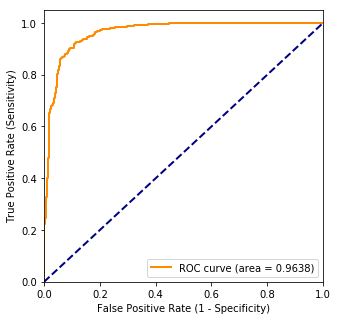

In [17]:
# train
fpr, tpr, threshold = roc_curve(train_y, logit_reg.predict_proba(train_X)[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

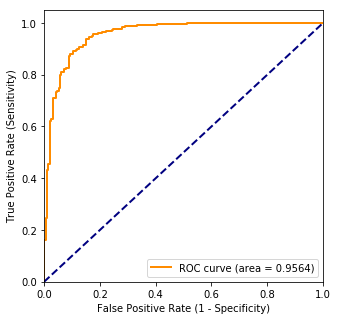

In [22]:
# valid
fpr, tpr, threshold = roc_curve(valid_y, logit_reg.predict_proba(valid_X)[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

## 실습 Data: FlightDelays
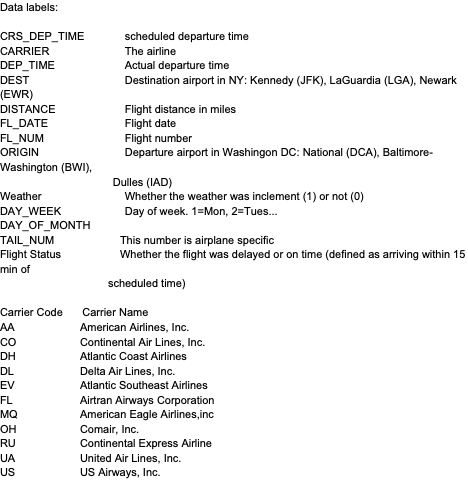

##### data

In [4]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
target = ['Flight Status']

In [5]:
#delays_df = pd.read_csv('./data/FlightDelays.csv')
delays_df = pd.read_csv('./data/FlightDelays.csv')[predictors+target]
delays_df

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER,Flight Status
0,4,1455,BWI,JFK,OH,ontime
1,4,1640,DCA,JFK,DH,ontime
2,4,1245,IAD,LGA,DH,ontime
3,4,1715,IAD,LGA,DH,ontime
4,4,1039,IAD,LGA,DH,ontime
...,...,...,...,...,...,...
2196,6,645,DCA,EWR,RU,ontime
2197,6,1700,IAD,EWR,RU,ontime
2198,6,1600,DCA,EWR,RU,ontime
2199,6,1359,DCA,EWR,RU,ontime


##### preprocessing

In [6]:
# DAY_WEEK
print("이전 type: ", delays_df.DAY_WEEK.dtype)
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
print("이후 type: ", delays_df.DAY_WEEK.dtype)

이전 type:  int64
이후 type:  category


In [7]:
# CRS_DEP_TIME
delays_df.CRS_DEP_TIME = [np.floor(t / 100) for t in delays_df.CRS_DEP_TIME] ### Write code: 시간분 -> 시간으로 변형
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category') ### Write code: category형으로 변환
print(delays_df.CRS_DEP_TIME.dtype)
print('')
print(delays_df.CRS_DEP_TIME.value_counts().sort_index())

category

6.0     126
7.0     135
8.0     162
9.0     108
10.0    100
11.0     68
12.0    142
13.0    157
14.0    236
15.0    154
16.0    178
17.0    241
18.0     85
19.0    119
20.0     53
21.0    137
Name: CRS_DEP_TIME, dtype: int64


In [8]:
# one-hot encoding
X = pd.get_dummies(delays_df[predictors])
X.head()

,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_6.0,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,...,DEST_JFK,DEST_LGA,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [9]:
# y 지정
y = delays_df["Flight Status"]
y.head()

0    ontime
1    ontime
2    ontime
3    ontime
4    ontime
Name: Flight Status, dtype: object

##### train : valid = 6 : 4

In [10]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

##### Learn logistic regression model

In [25]:
logit_reg = LogisticRegression(C=1e42)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42)

##### 모델 확인

In [26]:
print(logit_reg.intercept_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

[0.80004164]


,coeff
DAY_WEEK_1,-0.450706
DAY_WEEK_2,0.024434
DAY_WEEK_3,0.328572
DAY_WEEK_4,0.454519
DAY_WEEK_5,-0.052110
DAY_WEEK_6,0.760532
DAY_WEEK_7,-0.265199
CRS_DEP_TIME_6.0,0.692138
CRS_DEP_TIME_7.0,0.081602
CRS_DEP_TIME_8.0,0.268710


In [28]:
print(logit_reg.intercept_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

[0.80004164]


,coeff
DAY_WEEK_1,-0.450706
DAY_WEEK_2,0.024434
DAY_WEEK_3,0.328572
DAY_WEEK_4,0.454519
DAY_WEEK_5,-0.052110
DAY_WEEK_6,0.760532
DAY_WEEK_7,-0.265199
CRS_DEP_TIME_6.0,0.692138
CRS_DEP_TIME_7.0,0.081602
CRS_DEP_TIME_8.0,0.268710


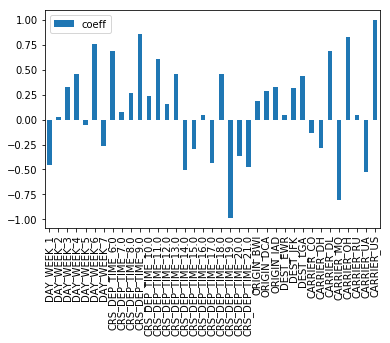

In [63]:
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).plot.bar()

##### 성능 평가

accuracy

In [31]:
print("train: ", accuracy_score(train_y, logit_reg.predict(train_X)))
print("valid: ", accuracy_score(valid_y, logit_reg.predict(valid_X)))

train:  0.8007575757575758
valid:  0.811577752553916


confusion matrix

In [33]:
print("train")
print(confusion_matrix(train_y, logit_reg.predict(train_X), labels=["delayed", "ontime"]))
print("\nvalid")
print(confusion_matrix(valid_y, logit_reg.predict(valid_X), labels=["delayed", "ontime"]))

train
[[  11  250]
 [  13 1046]]

valid
[[  8 159]
 [  7 707]]


ROC curve & AUC

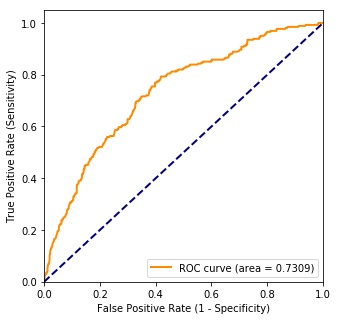

In [60]:
# train
fpr, tpr, threshold = roc_curve(train_y, logit_reg.predict_proba(train_X)[:, 0], pos_label="delayed")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

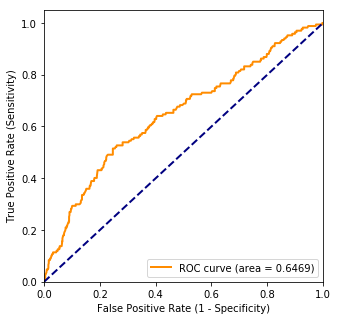

In [39]:
# valid
fpr, tpr, threshold = roc_curve(valid_y, logit_reg.predict_proba(valid_X)[:, 0], pos_label="delayed")
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")